In [43]:
import tensorflow
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2
import os
from PIL import Image

In [3]:
train_path = 'D:\Books\study\python\Analytics Vidya\Fashion mnist\\train\\train'
test_path = 'D:\Books\study\python\Analytics Vidya\Fashion mnist\\test\\test'
df_train = pd.read_csv('D:\Books\study\python\Analytics Vidya\Fashion mnist\\train\\train.csv')
df_test = pd.read_csv('D:\Books\study\python\Analytics Vidya\Fashion mnist\\test\\test.csv')

In [4]:
df_train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [11]:
import glob

In [6]:
train_id = df_train['id'].values
train_label = df_train['id'].values

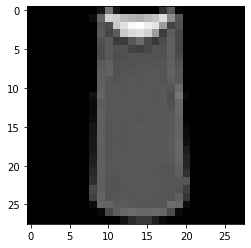

In [13]:
curr_path = train_path + '\\' + str(train_id[2]) + '.png'
img = plt.imread(curr_path)
plt.imshow(img)

In [8]:
img.shape

(28, 28, 4)

In [14]:
img = cv2.imread(curr_path)

In [10]:
img.shape

(28, 28, 3)

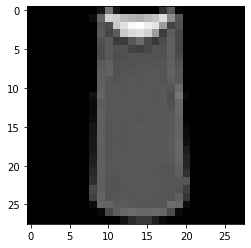

In [15]:
plt.imshow(img)

In [16]:
img.ravel().shape

(2352,)

In [63]:
path = train_path + '\\'
os.chdir(path)

In [74]:
X_train = []
Y_train = []
for entry in os.listdir():
    curr_path = path + entry
    img = cv2.imread(curr_path)
        #img_from_ar = Image.fromarray(img,'RGB')
        #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    X_train.append(np.array(img))
    Y_train.append(df_train.iloc[int(entry.split('.')[0])-1]['label'])
        #print('Done')

In [24]:
len(os.listdir(path))

60000

In [41]:
df_train.iloc[int(os.listdir(path)[0].split('.')[0])-1]['label']

9

In [77]:
X_train_arr = np.array(X_train)

In [79]:
Y_train_arr = np.array(Y_train)

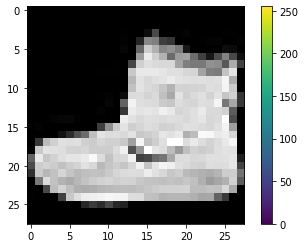

In [80]:
plt.imshow(X_train_arr[0])
plt.colorbar()

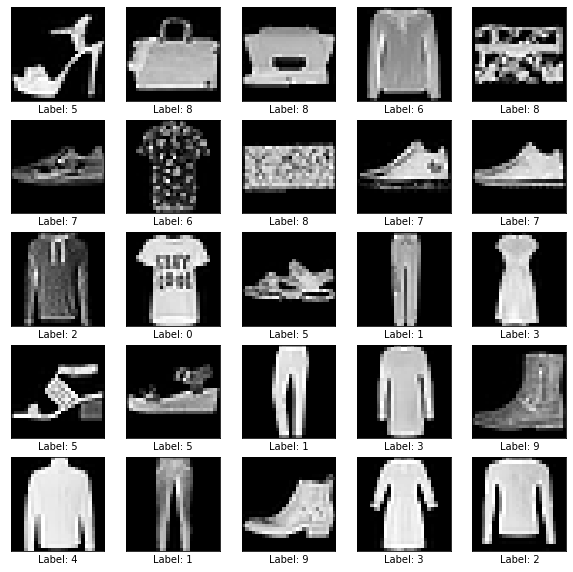

In [85]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_arr[i])
    plt.xlabel('Label: {}'.format(Y_train_arr[i]))
plt.show()

In [87]:
from tensorflow import keras

In [115]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [116]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [117]:
model.fit(X_train_std,Y_train_arr,batch_size=32,epochs=10,verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.4941 - accuracy: 0.8203
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3079 - accuracy: 0.8882
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2655 - accuracy: 0.9029
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2359 - accuracy: 0.9137
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2150 - accuracy: 0.9200
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1954 - accuracy: 0.9279
Epoch 7/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1792 - accuracy: 0.9329
Epoch 8/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1625 - accuracy: 0.9394
Epoch 9/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1516 - accuracy: 0.9427
Epoc

In [99]:
np.min(X_train_arr[0])

0

In [104]:
X_train_std = X_train_arr.astype('float32')/255

In [106]:
np.max(X_train_std[100])

1.0

In [107]:
np.max(X_train_arr[100])

255

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)              

In [118]:
model.fit(X_train_std,Y_train_arr,batch_size=32,epochs=10,verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1285 - accuracy: 0.9510
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1184 - accuracy: 0.9543
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1099 - accuracy: 0.9574
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1037 - accuracy: 0.9598
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0975 - accuracy: 0.9624
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0922 - accuracy: 0.9635
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0867 - accuracy: 0.9668
Epoch 8/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0786 - accuracy: 0.9688
Epoch 9/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0775 - accuracy: 0.9692
Epoch

In [125]:
path = test_path + '\\'
os.chdir(path)
X_test = []
#Y_train = []
for entry in test_id:
    curr_path = path + str(entry) + '.png'
    img = cv2.imread(curr_path)
        #img_from_ar = Image.fromarray(img,'RGB')
        #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    X_test.append(np.array(img))
    #Y_train.append(df_train.iloc[int(entry.split('.')[0])-1]['label'])
        #print('Done')

In [120]:
test_id = df_test['id'].values

In [121]:
test_id[:5]

array([60001, 60002, 60003, 60004, 60005], dtype=int64)

In [130]:
X_test_std = np.array(X_test).astype('float32')/255

In [131]:
np.max(X_test_std[0])

1.0

In [132]:
Y_pred = model.predict(X_test_std,verbose=1)

10000/10000 [==============================] - 1s 77us/sample


In [138]:
Y_pred_val = np.array([np.argmax(i) for i in Y_pred])

In [140]:
submission = np.concatenate((test_id.reshape(len(test_id),1),Y_pred_val.reshape(len(Y_pred_val),1)),axis=1)

In [139]:
type(Y_pred_val)

numpy.ndarray

In [141]:
submission[:5]

array([[60001,     9],
       [60002,     2],
       [60003,     1],
       [60004,     1],
       [60005,     6]], dtype=int64)

In [142]:
submission_df = pd.DataFrame(submission,columns=['id','label'],index=None)

In [143]:
submission_df.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [146]:
pd.DataFrame(submission_df).to_csv('D:\Books\study\python\programs\ML Practice\\fmnist_cnn.csv',columns=['id','label'],index=None)

In [149]:
keras.models.save_model(model,'D:\Books\study\python\programs\ML Practice\\fmnist_cnn.hdf5')

In [153]:
np.save('D:\Books\study\python\programs\ML Practice\Y_pred',Y_pred_val)